<a href="https://colab.research.google.com/github/itsMeJunaid/codealpha_tasks/blob/main/Credit_Scoring_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Scoring Model**


# 01. Importing Important Libraries

In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,  OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from scipy.stats import skew, kurtosis


In [ ]:
# Set visual style
sns.set_style("whitegrid")

# 02: Load Dataset

In [73]:
df = pd.read_csv('/content/drive/MyDrive/1 Machine Learning/07 Credit Scoring Model/data.csv')

df.head()

Age  Gender    Education  Income   Debt  Credit_Score  Loan_Amount  \
0   56  Female       Master  149406  34089           581        49200   
1   69  Female  High School   78896   8626           648        20147   
2   46  Female       Master  119339  46281           329        41307   
3   32    Male  High School  131067  29403           816        19019   
4   60    Male          PhD   38001  30032           673        16317   

   Loan_Term  Num_Credit_Cards Payment_History Employment_Status  \
0         60                 4             Bad        Unemployed   
1         24                 7            Good          Employed   
2         12                 8             Bad        Unemployed   
3         60                 8             Bad          Employed   
4         36                 4         Average          Employed   

  Residence_Type Marital_Status  Creditworthiness  
0         Rented         Single                 1  
1      Mortgaged        Married                 1  
2          Owned         Single                 1  
3          Owned         Single                 1  
4         Rented        Married                 0

# 3: Data Cleaning & Preprocessing

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                12000 non-null  int64 
 1   Gender             12000 non-null  object
 2   Education          12000 non-null  object
 3   Income             12000 non-null  int64 
 4   Debt               12000 non-null  int64 
 5   Credit_Score       12000 non-null  int64 
 6   Loan_Amount        12000 non-null  int64 
 7   Loan_Term          12000 non-null  int64 
 8   Num_Credit_Cards   12000 non-null  int64 
 9   Payment_History    12000 non-null  object
 10  Employment_Status  12000 non-null  object
 11  Residence_Type     12000 non-null  object
 12  Marital_Status     12000 non-null  object
 13  Creditworthiness   12000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.3+ MB


In [75]:
df.describe()

Age         Income          Debt  Credit_Score   Loan_Amount  \
count  12000.000000   12000.000000  12000.000000  12000.000000  12000.000000   
mean      43.489250   85222.009417  25354.673250    573.967583  25113.951250   
std       14.908982   37640.043409  14087.390846    157.816052  14247.092051   
min       18.000000   20026.000000   1001.000000    300.000000    501.000000   
25%       31.000000   52400.750000  13161.000000    437.000000  12725.000000   
50%       43.000000   85756.000000  25382.500000    574.000000  25220.500000   
75%       56.000000  117754.750000  37497.500000    709.000000  37348.000000   
max       69.000000  149984.000000  49995.000000    849.000000  49996.000000   

          Loan_Term  Num_Credit_Cards  Creditworthiness  
count  12000.000000      12000.000000      12000.000000  
mean      35.943000          4.985833          0.702583  
std       16.965162          2.593458          0.457140  
min       12.000000          1.000000          0.000000  
25%       24.000000          3.000000          0.000000  
50%       36.000000          5.000000          1.000000  
75%       48.000000          7.000000          1.000000  
max       60.000000          9.000000          1.000000

In [76]:
df.isnull().sum()

Age                  0
Gender               0
Education            0
Income               0
Debt                 0
Credit_Score         0
Loan_Amount          0
Loan_Term            0
Num_Credit_Cards     0
Payment_History      0
Employment_Status    0
Residence_Type       0
Marital_Status       0
Creditworthiness     0
dtype: int64

In [77]:
#printing All Column
df.columns

Index(['Age', 'Gender', 'Education', 'Income', 'Debt', 'Credit_Score',
       'Loan_Amount', 'Loan_Term', 'Num_Credit_Cards', 'Payment_History',
       'Employment_Status', 'Residence_Type', 'Marital_Status',
       'Creditworthiness'],
      dtype='object')

In [78]:
#Checking Columns Data type
df.dtypes

Age                   int64
Gender               object
Education            object
Income                int64
Debt                  int64
Credit_Score          int64
Loan_Amount           int64
Loan_Term             int64
Num_Credit_Cards      int64
Payment_History      object
Employment_Status    object
Residence_Type       object
Marital_Status       object
Creditworthiness      int64
dtype: object

## **3.1: Statistical Summary**

In [79]:
print("\n--- Numerical Feature Statistics ---")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
descriptive_stats = df[numerical_cols].describe().T

descriptive_stats["skewness"] = df[numerical_cols].apply(lambda x: skew(x))
descriptive_stats["kurtosis"] = df[numerical_cols].apply(lambda x: kurtosis(x))
print(descriptive_stats)


--- Numerical Feature Statistics ---
                    count          mean           std      min       25%  \
Age               12000.0     43.489250     14.908982     18.0     31.00   
Income            12000.0  85222.009417  37640.043409  20026.0  52400.75   
Debt              12000.0  25354.673250  14087.390846   1001.0  13161.00   
Credit_Score      12000.0    573.967583    157.816052    300.0    437.00   
Loan_Amount       12000.0  25113.951250  14247.092051    501.0  12725.00   
Loan_Term         12000.0     35.943000     16.965162     12.0     24.00   
Num_Credit_Cards  12000.0      4.985833      2.593458      1.0      3.00   
Creditworthiness  12000.0      0.702583      0.457140      0.0      0.00   

                      50%        75%       max  skewness  kurtosis  
Age                  43.0      56.00      69.0  0.008426 -1.184611  
Income            85756.0  117754.75  149984.0 -0.026888 -1.197758  
Debt              25382.5   37497.50   49995.0  0.018246 -1.195312  
C

In [80]:
descriptive_stats

count          mean           std      min       25%  \
Age               12000.0     43.489250     14.908982     18.0     31.00   
Income            12000.0  85222.009417  37640.043409  20026.0  52400.75   
Debt              12000.0  25354.673250  14087.390846   1001.0  13161.00   
Credit_Score      12000.0    573.967583    157.816052    300.0    437.00   
Loan_Amount       12000.0  25113.951250  14247.092051    501.0  12725.00   
Loan_Term         12000.0     35.943000     16.965162     12.0     24.00   
Num_Credit_Cards  12000.0      4.985833      2.593458      1.0      3.00   
Creditworthiness  12000.0      0.702583      0.457140      0.0      0.00   

                      50%        75%       max  skewness  kurtosis  
Age                  43.0      56.00      69.0  0.008426 -1.184611  
Income            85756.0  117754.75  149984.0 -0.026888 -1.197758  
Debt              25382.5   37497.50   49995.0  0.018246 -1.195312  
Credit_Score        574.0     709.00     849.0  0.004976 -1.187732  
Loan_Amount       25220.5   37348.00   49996.0 -0.005295 -1.195521  
Loan_Term            36.0      48.00      60.0  0.007337 -1.304384  
Num_Credit_Cards      5.0       7.00       9.0 -0.001768 -1.238128  
Creditworthiness      1.0       1.00       1.0 -0.886344 -1.214395

In [81]:
# Categorical Feature Value Counts
print("\n--- Categorical Feature Distribution ---")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())


--- Categorical Feature Distribution ---

Gender Distribution:
Gender
Female    6012
Male      5988
Name: count, dtype: int64

Education Distribution:
Education
PhD            3033
Bachelor       3006
Master         2995
High School    2966
Name: count, dtype: int64

Payment_History Distribution:
Payment_History
Good       4045
Bad        4025
Average    3930
Name: count, dtype: int64

Employment_Status Distribution:
Employment_Status
Self-Employed    4046
Unemployed       3979
Employed         3975
Name: count, dtype: int64

Residence_Type Distribution:
Residence_Type
Owned        4051
Mortgaged    3985
Rented       3964
Name: count, dtype: int64

Marital_Status Distribution:
Marital_Status
Married     4012
Divorced    4006
Single      3982
Name: count, dtype: int64


ValueError: num must be an integer with 1 <= num <= 6, not 7

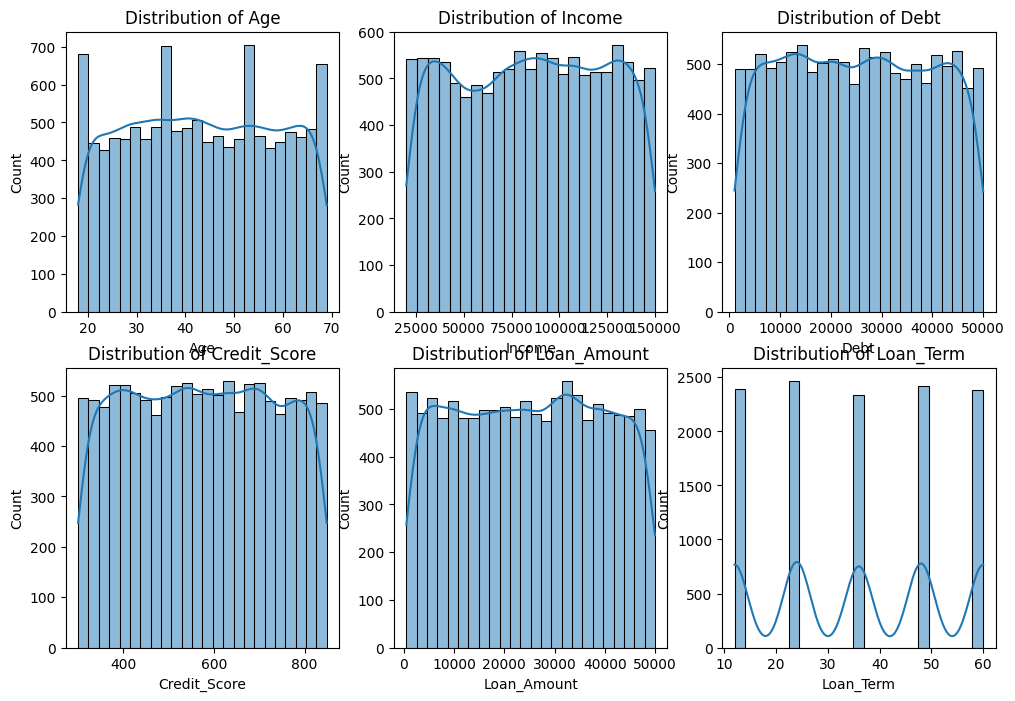

In [82]:
# Histograms for numeric distributions.
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

### 3.1.1 Correlation Heatmap

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## 3.2:  Target Variable Analysis

<ipython-input-83-d487427c05a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Creditworthiness'], palette='viridis')


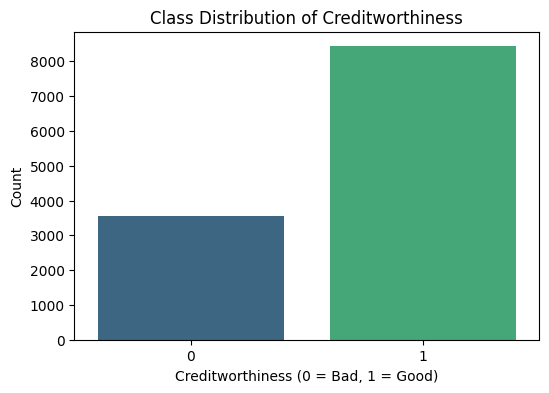

In [83]:
# Creditworthiness Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Creditworthiness'], palette='viridis')
plt.title("Class Distribution of Creditworthiness")
plt.xlabel("Creditworthiness (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.show()

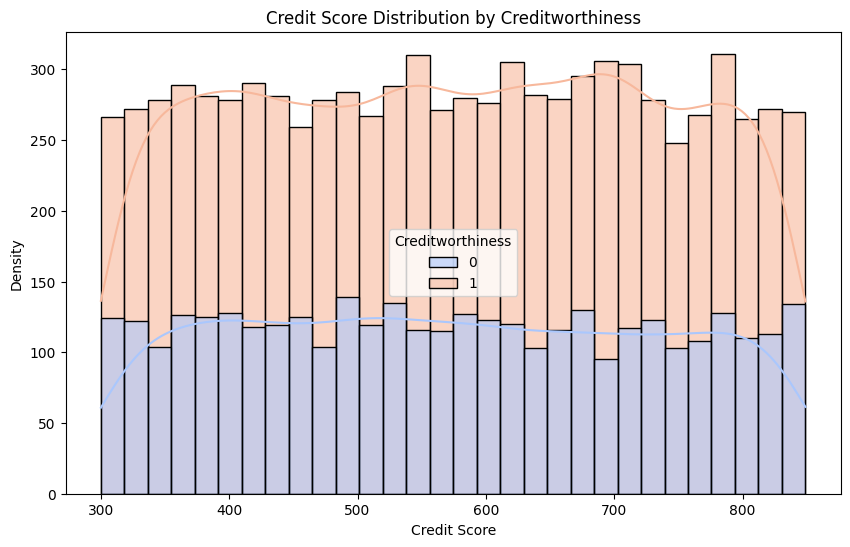

In [84]:
# Credit Score Distribution by Creditworthiness
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Credit_Score', hue='Creditworthiness', kde=True, bins=30, palette='coolwarm', alpha=0.6)
plt.title("Credit Score Distribution by Creditworthiness")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

# **04: EDA (Data Visualization)**

## 4.1:  Univariate Analysis

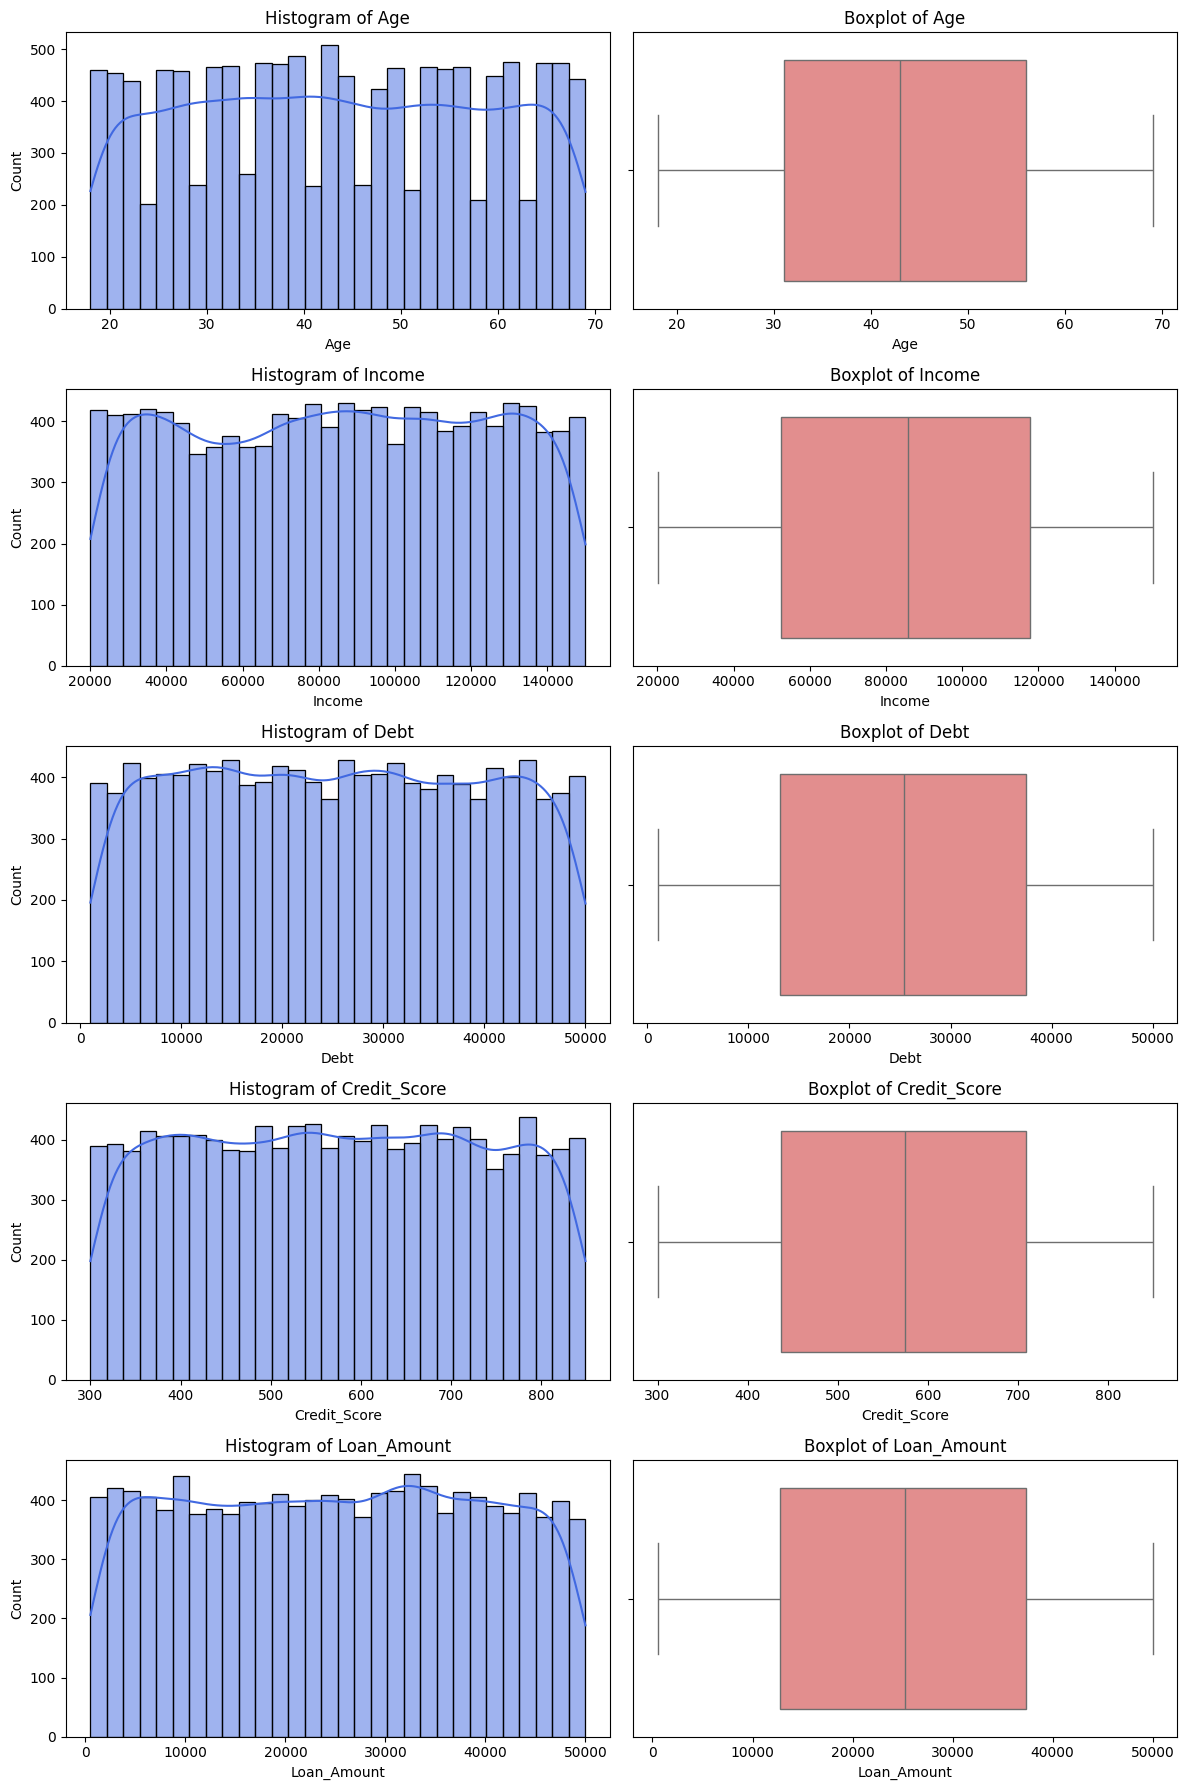

In [85]:
# Numerical Features: Histograms & Boxplots
num_features = ["Age", "Income", "Debt", "Credit_Score", "Loan_Amount"]
fig, axes = plt.subplots(len(num_features), 2, figsize=(12, 18))

for i, feature in enumerate(num_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i, 0], color="royalblue")
    axes[i, 0].set_title(f"Histogram of {feature}")

    sns.boxplot(x=df[feature], ax=axes[i, 1], color="lightcoral")
    axes[i, 1].set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

<ipython-input-86-2d015574cec3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette="viridis", ax=axes[i])
<ipython-input-86-2d015574cec3>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-86-2d015574cec3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette="viridis", ax=axes[i])
<ipython-input-86-2d015574cec3>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklab

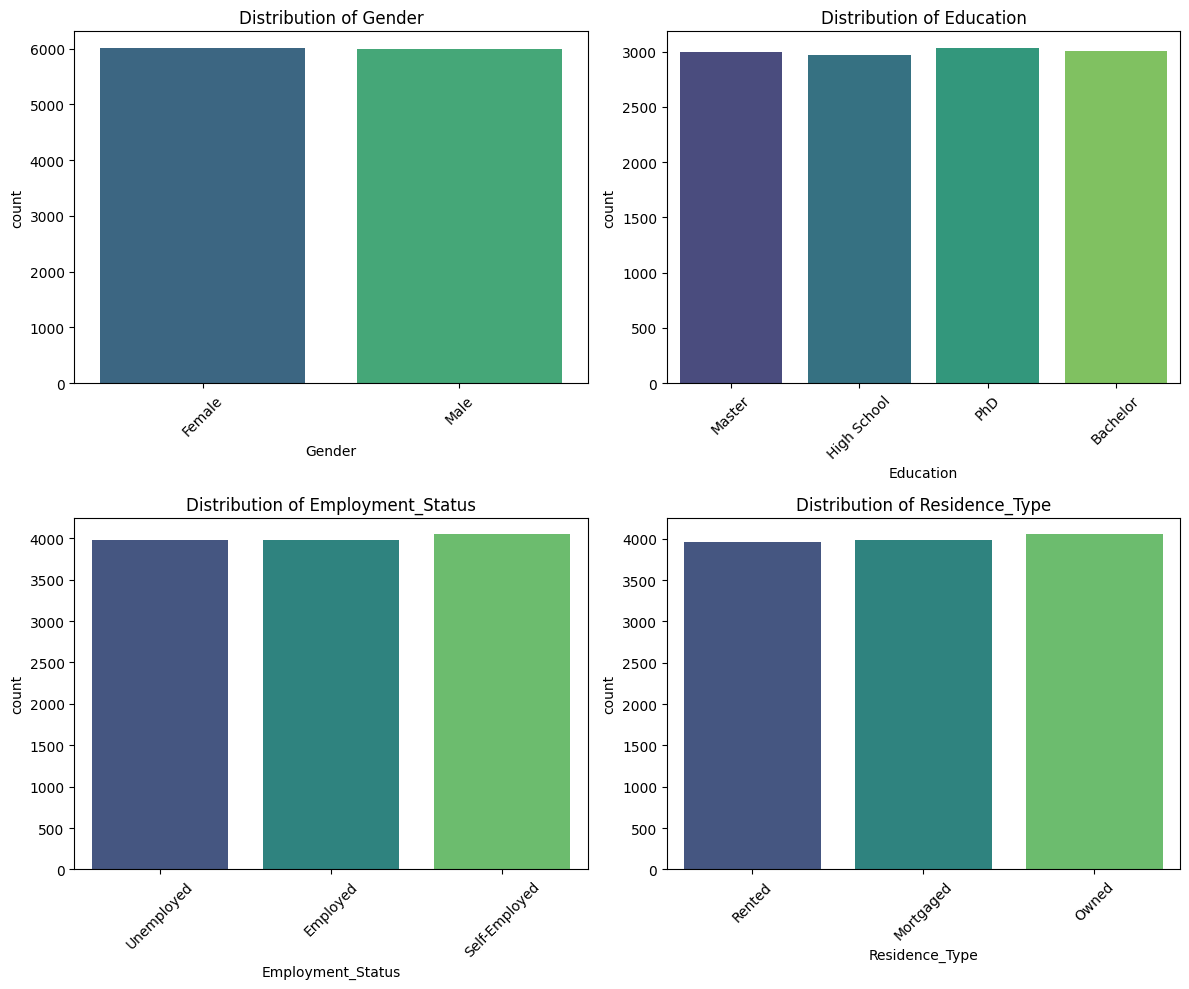

In [86]:
# Categorical Features: Bar Charts
cat_features = ["Gender", "Education", "Employment_Status", "Residence_Type"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(x=df[feature], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## **4.3: BIVARIATE & MULTIVARIATE ANALYSIS**

<ipython-input-87-062b7a9991e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Creditworthiness"], y=df["Credit_Score"], palette="coolwarm")


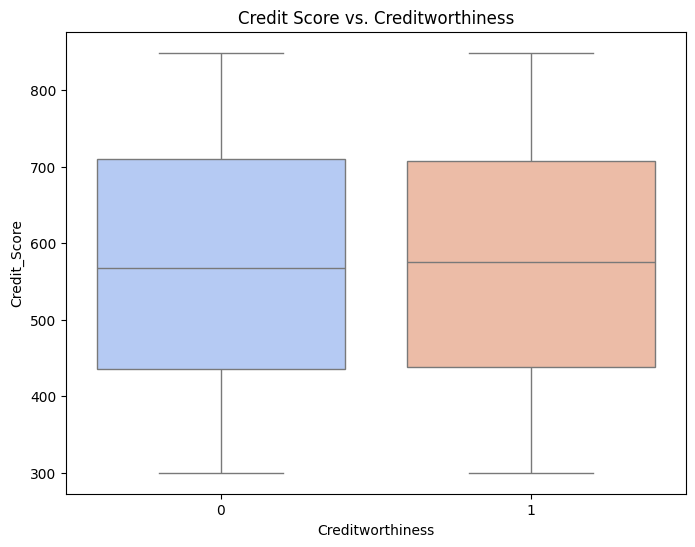

In [87]:
# Boxplot: Credit Score vs. Creditworthiness
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Creditworthiness"], y=df["Credit_Score"], palette="coolwarm")
plt.title("Credit Score vs. Creditworthiness")
plt.show()

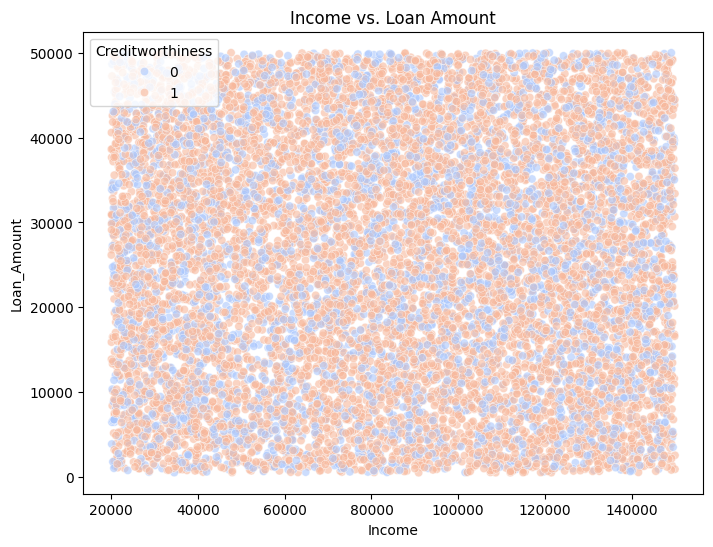

In [88]:
# Scatter Plot: Income vs. Loan Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Income"], y=df["Loan_Amount"], hue=df["Creditworthiness"], palette="coolwarm", alpha=0.6)
plt.title("Income vs. Loan Amount")
plt.show()

<Figure size 1000x600 with 0 Axes>

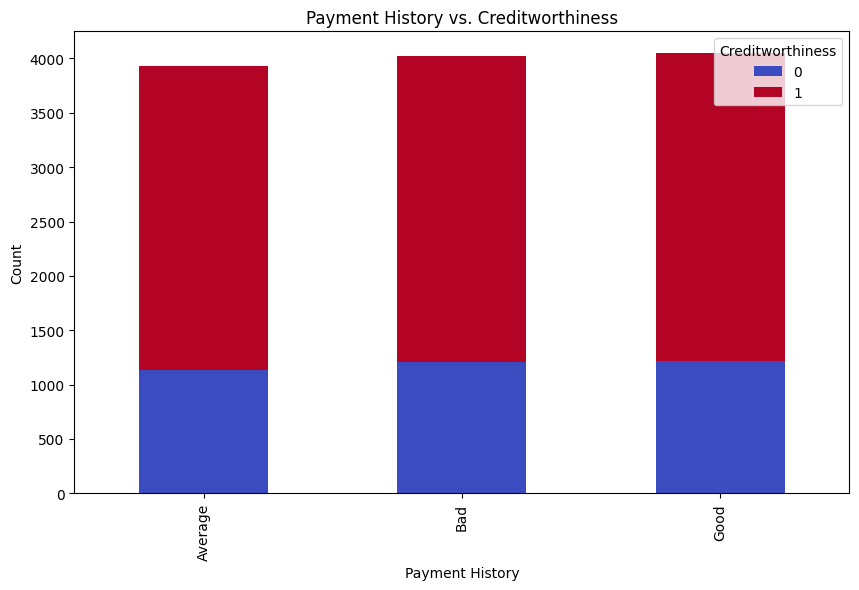

In [89]:
# Stacked Bar Chart: Payment History vs. Creditworthiness
plt.figure(figsize=(10, 6))
pd.crosstab(df["Payment_History"], df["Creditworthiness"]).plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10,6))
plt.title("Payment History vs. Creditworthiness")
plt.xlabel("Payment History")
plt.ylabel("Count")
plt.legend(title="Creditworthiness")
plt.show()

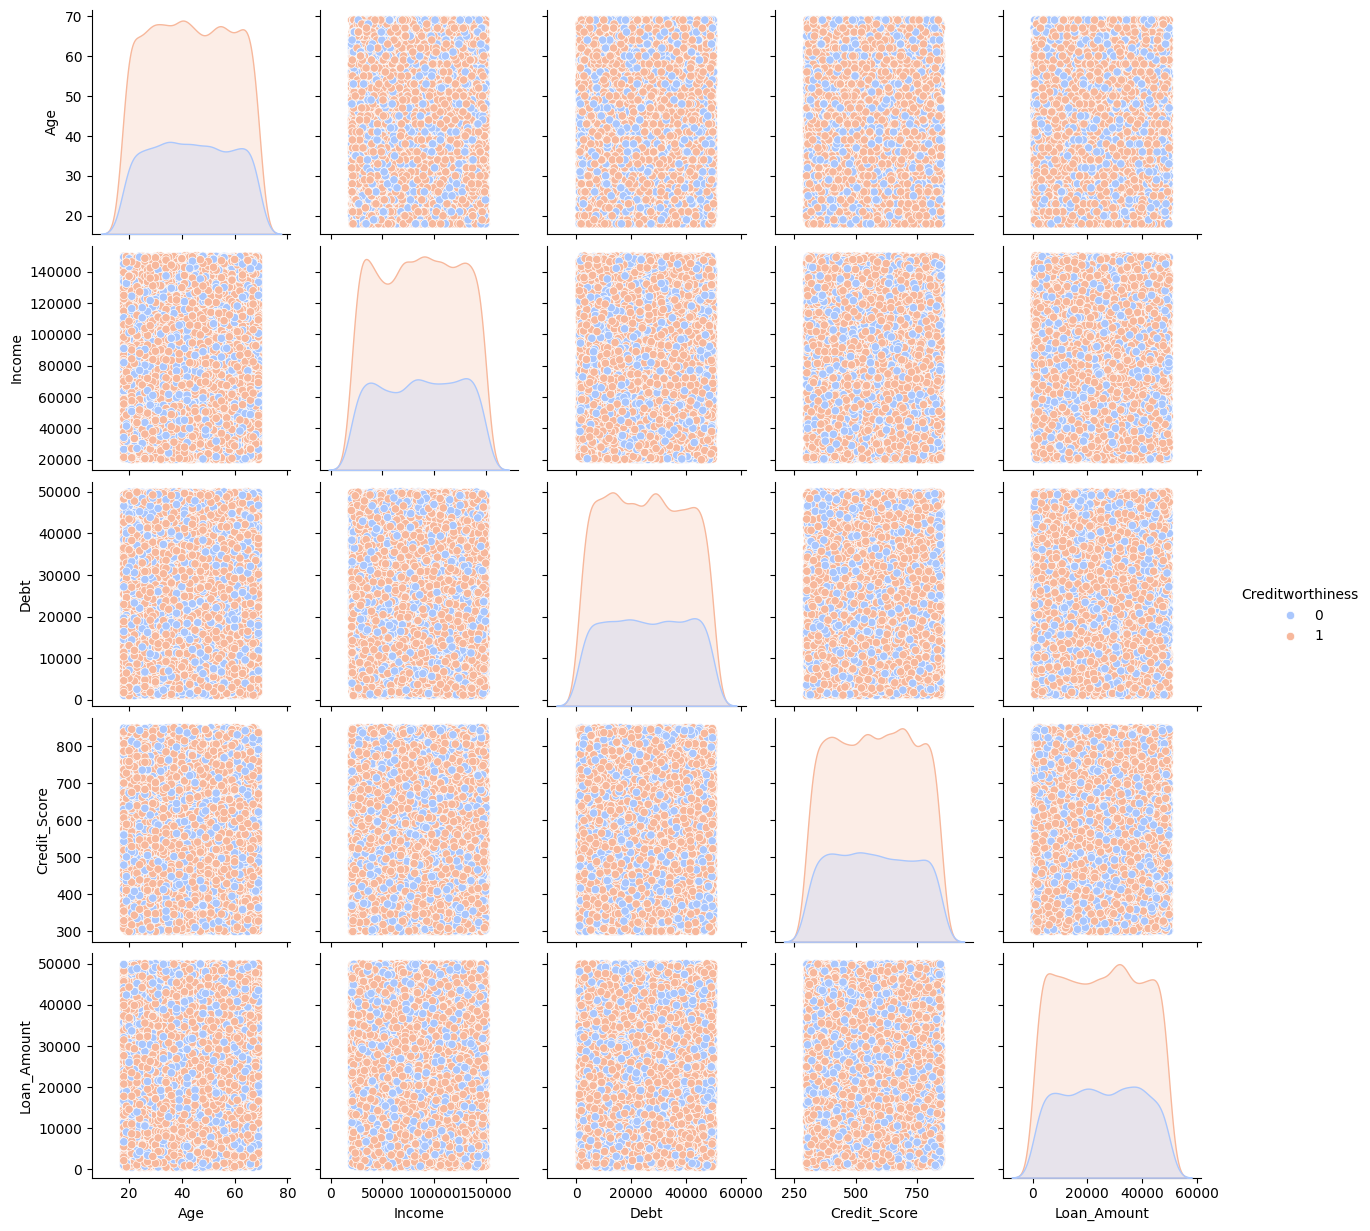

In [90]:
# Pairplot: Relationships between Numerical Features
sns.pairplot(df[num_features + ["Creditworthiness"]], hue="Creditworthiness", palette="coolwarm", diag_kind="kde")
plt.show()

# **05: Data Preprocessing & Feature Engineering**

In [91]:
### 5.1. HANDLING MISSING VALUES ###

# Identify numerical and categorical columns
num_features = ["Age", "Income", "Debt", "Credit_Score", "Loan_Amount", "Loan_Term", "Num_Credit_Cards"]
cat_features = ["Gender", "Education", "Employment_Status", "Residence_Type", "Marital_Status", "Payment_History"]

# Handling missing values in numerical features
for col in num_features:
    if df[col].skew() > 0.5:  # Skewed data → use median
        df[col].fillna(df[col].median(), inplace=True)
    else:  # Normally distributed data → use mean
        df[col].fillna(df[col].mean(), inplace=True)

# Handling missing values in categorical features
for col in cat_features:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode

<ipython-input-91-88ecd500da1d>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-91-88ecd500da1d>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## 5.2. ENCODING CATEGORICAL FEATURES

In [92]:
# One-Hot Encoding for nominal categorical features
df = pd.get_dummies(df, columns=["Gender", "Education", "Employment_Status", "Residence_Type", "Marital_Status"], drop_first=True)

In [93]:
# Label Encoding for ordinal categorical feature (Payment History)
payment_mapping = {"Bad": 0, "Average": 1, "Good": 2}
df["Payment_History"] = df["Payment_History"].map(payment_mapping)

In [94]:
df.sample(5)

Age  Income   Debt  Credit_Score  Loan_Amount  Loan_Term  \
8412    34  142347  36399           810        12131         36   
1165    35   88743   9327           699        15481         12   
11597   60  107519  31038           714         5983         60   
5826    38   20397  44223           678        10101         12   
4859    33  134025   2782           691        31275         12   

       Num_Credit_Cards  Payment_History  Creditworthiness  Gender_Male  \
8412                  9                2                 1         True   
1165                  7                2                 1         True   
11597                 1                2                 0        False   
5826                  5                2                 1        False   
4859                  3                2                 1         True   

       Education_High School  Education_Master  Education_PhD  \
8412                   False             False           True   
1165                   False              True          False   
11597                  False             False          False   
5826                    True             False          False   
4859                   False             False           True   

       Employment_Status_Self-Employed  Employment_Status_Unemployed  \
8412                              True                         False   
1165                             False                          True   
11597                            False                          True   
5826                              True                         False   
4859                             False                          True   

       Residence_Type_Owned  Residence_Type_Rented  Marital_Status_Married  \
8412                  False                  False                   False   
1165                   True                  False                   False   
11597                 False                   True                    True   
5826                   True                  False                   False   
4859                   True                  False                    True   

       Marital_Status_Single  
8412                    True  
1165                   False  
11597                  False  
5826                    True  
4859                   False

## **5.3: FEATURE SCALING & TRANSFORMATION**

In [96]:
# Standardization (Z-score) for normally distributed numerical features
std_scaler = StandardScaler()
df[["Income", "Loan_Amount", "Debt", "Credit_Score"]] = std_scaler.fit_transform(df[["Income", "Loan_Amount", "Debt", "Credit_Score"]])

In [97]:
# MinMax Scaling (0-1 normalization) for Loan Term & Num Credit Cards
minmax_scaler = MinMaxScaler()
df[["Loan_Term", "Num_Credit_Cards"]] = minmax_scaler.fit_transform(df[["Loan_Term", "Num_Credit_Cards"]])

In [98]:
df.head()

Age    Income      Debt  Credit_Score  Loan_Amount  Loan_Term  \
0   56  1.705276  0.620036      0.044563     1.690664       1.00   
1   69 -0.168073 -1.187542      0.469125    -0.348644       0.25   
2   46  0.906439  1.485527     -1.552300     1.136634       0.00   
3   32  1.218035  0.287384      1.533700    -0.427821       1.00   
4   60 -1.254594  0.332036      0.627544    -0.617482       0.50   

   Num_Credit_Cards  Payment_History  Creditworthiness  Gender_Male  \
0             0.375                0                 1        False   
1             0.750                2                 1        False   
2             0.875                0                 1        False   
3             0.875                0                 1         True   
4             0.375                1                 0         True   

   Education_High School  Education_Master  Education_PhD  \
0                  False              True          False   
1                   True             False          False   
2                  False              True          False   
3                   True             False          False   
4                  False             False           True   

   Employment_Status_Self-Employed  Employment_Status_Unemployed  \
0                            False                          True   
1                            False                         False   
2                            False                          True   
3                            False                         False   
4                            False                         False   

   Residence_Type_Owned  Residence_Type_Rented  Marital_Status_Married  \
0                 False                   True                   False   
1                 False                  False                    True   
2                  True                  False                   False   
3                  True                  False                   False   
4                 False                   True                    True   

   Marital_Status_Single  
0                   True  
1                  False  
2                   True  
3                   True  
4                  False

## **5.4. Feature Selection**

In [99]:
# 1️⃣ Variance Thresholding (Remove features with very low variance)
var_thresh = VarianceThreshold(threshold=0.01)  # Remove near-constant features
df_var = var_thresh.fit_transform(df)
df = pd.DataFrame(df_var, columns=df.columns[var_thresh.get_support()])

In [100]:
# 2️⃣ Correlation-Based Feature Selection
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]


In [101]:
df.drop(high_corr_features, axis=1, inplace=True)  # Drop highly correlated features


In [102]:
df.head()

Age    Income      Debt  Credit_Score  Loan_Amount  Loan_Term  \
0  56.0  1.705276  0.620036      0.044563     1.690664       1.00   
1  69.0 -0.168073 -1.187542      0.469125    -0.348644       0.25   
2  46.0  0.906439  1.485527     -1.552300     1.136634       0.00   
3  32.0  1.218035  0.287384      1.533700    -0.427821       1.00   
4  60.0 -1.254594  0.332036      0.627544    -0.617482       0.50   

   Num_Credit_Cards  Payment_History  Creditworthiness  Gender_Male  \
0             0.375              0.0               1.0          0.0   
1             0.750              2.0               1.0          0.0   
2             0.875              0.0               1.0          0.0   
3             0.875              0.0               1.0          1.0   
4             0.375              1.0               0.0          1.0   

   Education_High School  Education_Master  Education_PhD  \
0                    0.0               1.0            0.0   
1                    1.0               0.0            0.0   
2                    0.0               1.0            0.0   
3                    1.0               0.0            0.0   
4                    0.0               0.0            1.0   

   Employment_Status_Self-Employed  Employment_Status_Unemployed  \
0                              0.0                           1.0   
1                              0.0                           0.0   
2                              0.0                           1.0   
3                              0.0                           0.0   
4                              0.0                           0.0   

   Residence_Type_Owned  Residence_Type_Rented  Marital_Status_Married  \
0                   0.0                    1.0                     0.0   
1                   0.0                    0.0                     1.0   
2                   1.0                    0.0                     0.0   
3                   1.0                    0.0                     0.0   
4                   0.0                    1.0                     1.0   

   Marital_Status_Single  
0                    1.0  
1                    0.0  
2                    1.0  
3                    1.0  
4                    0.0

In [103]:
# 3️⃣ Feature Importance using RandomForest
X = df.drop("Creditworthiness", axis=1)
y = df["Creditworthiness"]

In [104]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [105]:
# Get feature importances
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

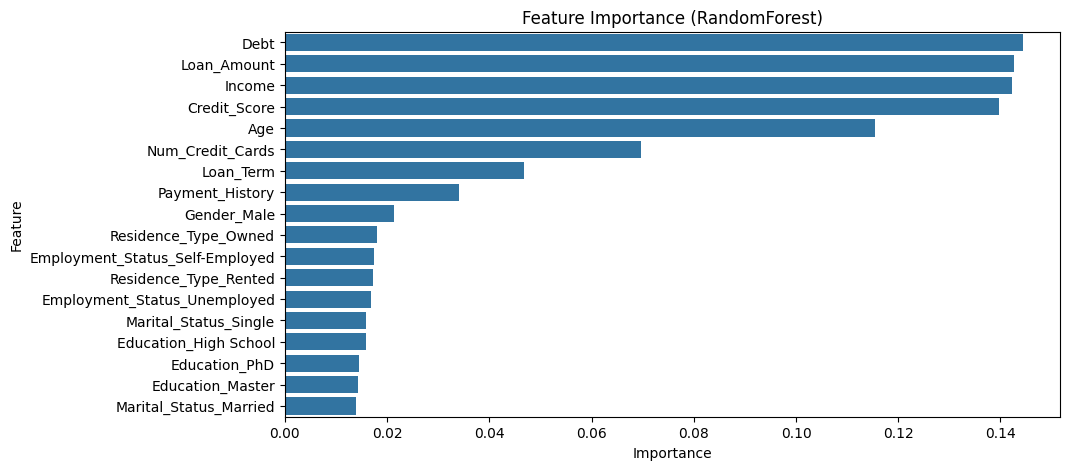

In [106]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"])
plt.title("Feature Importance (RandomForest)")
plt.show()

In [107]:
# Drop least important features (e.g., below threshold 0.01)
low_importance_features = feature_importance[feature_importance["Importance"] < 0.01]["Feature"].tolist()
df.drop(low_importance_features, axis=1, inplace=True)

## **5.5: FEATURE ENGINEERING**

In [108]:
# Create new engineered features
df["Debt_to_Income"] = df["Debt"] / df["Income"]
df["Credit_Utilization"] = df["Loan_Amount"] / df["Credit_Score"]

In [109]:
df.head(1)

Age    Income      Debt  Credit_Score  Loan_Amount  Loan_Term  \
0  56.0  1.705276  0.620036      0.044563     1.690664        1.0   

   Num_Credit_Cards  Payment_History  Creditworthiness  Gender_Male  ...  \
0             0.375              0.0               1.0          0.0  ...   

   Education_Master  Education_PhD  Employment_Status_Self-Employed  \
0               1.0            0.0                              0.0   

   Employment_Status_Unemployed  Residence_Type_Owned  Residence_Type_Rented  \
0                           1.0                   0.0                    1.0   

   Marital_Status_Married  Marital_Status_Single  Debt_to_Income  \
0                     0.0                    1.0        0.363599   

   Credit_Utilization  
0           37.939003  

[1 rows x 21 columns]

In [110]:
# Define bins and labels
bins = [0, 24, 45, 100]  # Ranges: (0-24), (25-45), (45+)
labels = ["Young", "Mid", "Senior"]

# Apply binning
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

In [112]:
df.sample(5)

Age    Income      Debt  Credit_Score  Loan_Amount  Loan_Term  \
8329  42.0  1.603970 -1.160070     -0.899614    -1.160282       0.75   
1665  56.0 -0.642242  1.108152      1.197852     0.235851       1.00   
9260  50.0  1.346255 -1.322136     -0.772879     0.709792       0.50   
7267  20.0  1.560079 -0.297418      1.514690     0.697789       0.00   
1360  49.0  1.654264  1.251052      1.463996     1.335489       1.00   

      Num_Credit_Cards  Payment_History  Creditworthiness  Gender_Male  ...  \
8329              0.25              1.0               0.0          1.0  ...   
1665              0.50              2.0               1.0          0.0  ...   
9260              0.25              0.0               1.0          1.0  ...   
7267              0.75              0.0               1.0          1.0  ...   
1360              1.00              0.0               1.0          1.0  ...   

      Education_PhD  Employment_Status_Self-Employed  \
8329            0.0                              1.0   
1665            0.0                              1.0   
9260            0.0                              0.0   
7267            1.0                              1.0   
1360            1.0                              1.0   

      Employment_Status_Unemployed  Residence_Type_Owned  \
8329                           0.0                   0.0   
1665                           0.0                   1.0   
9260                           1.0                   0.0   
7267                           0.0                   0.0   
1360                           0.0                   1.0   

      Residence_Type_Rented  Marital_Status_Married  Marital_Status_Single  \
8329                    0.0                     0.0                    1.0   
1665                    0.0                     0.0                    0.0   
9260                    0.0                     1.0                    0.0   
7267                    1.0                     0.0                    1.0   
1360                    0.0                     0.0                    0.0   

      Debt_to_Income  Credit_Utilization  Age_Group  
8329       -0.723249            1.289755        Mid  
1665       -1.725444            0.196895     Senior  
9260       -0.982084           -0.918374     Senior  
7267       -0.190643            0.460681      Young  
1360        0.756259            0.912222     Senior  

[5 rows x 22 columns]

In [113]:
df["Age_Group"].value_counts()


Age_Group
Senior    5479
Mid       4968
Young     1553
Name: count, dtype: int64

In [114]:
# Step 3: Check if NaN values still exist
print(df["Age_Group"].isnull().sum())  # Should print 0 now

0


In [115]:
# Mapping Age_Group to numbers
age_mapping = {"Young": 0, "Mid": 1, "Senior": 2}
df["Age_Group"] = df["Age_Group"].map(age_mapping)


In [116]:
# Drop original Age column
df.drop(columns=["Age"], inplace=True)



In [117]:
df.head()

Income      Debt  Credit_Score  Loan_Amount  Loan_Term  Num_Credit_Cards  \
0  1.705276  0.620036      0.044563     1.690664       1.00             0.375   
1 -0.168073 -1.187542      0.469125    -0.348644       0.25             0.750   
2  0.906439  1.485527     -1.552300     1.136634       0.00             0.875   
3  1.218035  0.287384      1.533700    -0.427821       1.00             0.875   
4 -1.254594  0.332036      0.627544    -0.617482       0.50             0.375   

   Payment_History  Creditworthiness  Gender_Male  Education_High School  ...  \
0              0.0               1.0          0.0                    0.0  ...   
1              2.0               1.0          0.0                    1.0  ...   
2              0.0               1.0          0.0                    0.0  ...   
3              0.0               1.0          1.0                    1.0  ...   
4              1.0               0.0          1.0                    0.0  ...   

   Education_PhD  Employment_Status_Self-Employed  \
0            0.0                              0.0   
1            0.0                              0.0   
2            0.0                              0.0   
3            0.0                              0.0   
4            1.0                              0.0   

   Employment_Status_Unemployed  Residence_Type_Owned  Residence_Type_Rented  \
0                           1.0                   0.0                    1.0   
1                           0.0                   0.0                    0.0   
2                           1.0                   1.0                    0.0   
3                           0.0                   1.0                    0.0   
4                           0.0                   0.0                    1.0   

   Marital_Status_Married  Marital_Status_Single  Debt_to_Income  \
0                     0.0                    1.0        0.363599   
1                     1.0                    0.0        7.065635   
2                     0.0                    1.0        1.638860   
3                     0.0                    1.0        0.235941   
4                     1.0                    0.0       -0.264656   

   Credit_Utilization  Age_Group  
0           37.939003          2  
1           -0.743178          2  
2           -0.732226          2  
3           -0.278947          1  
4           -0.983965          2  

[5 rows x 21 columns]

In [120]:
# changing Age_Group Data type to int64
df["Age_Group"] = df["Age_Group"].astype("int64")

In [121]:
df['Age_Group'].dtypes

dtype('int64')

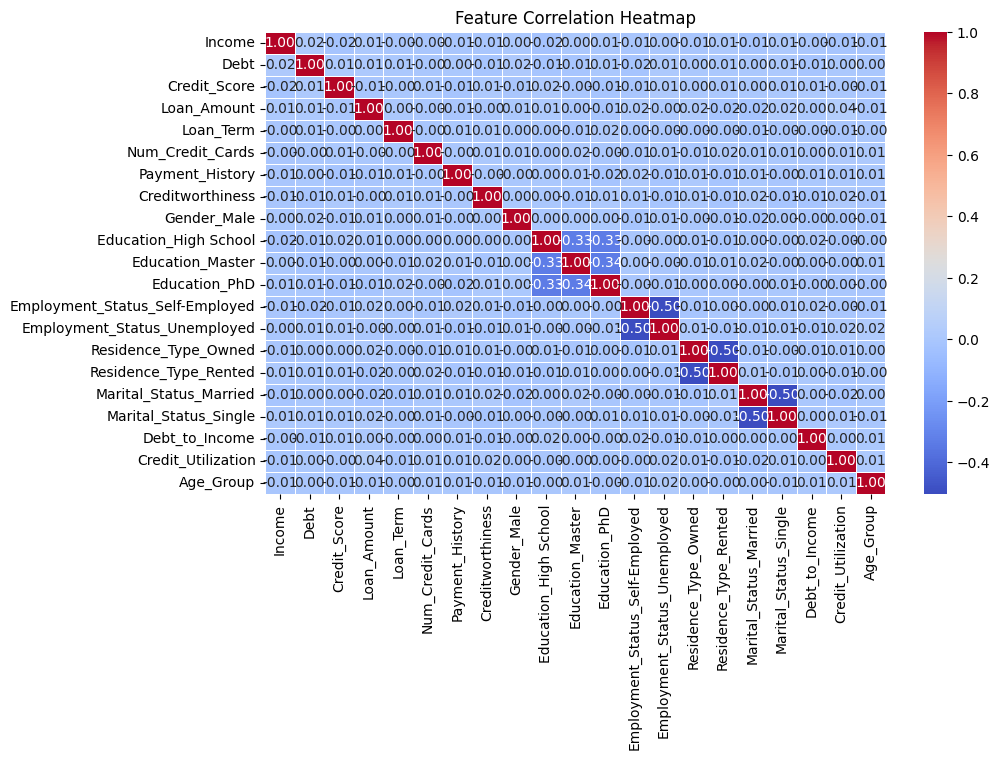

In [122]:
# Heatmap: Feature Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [123]:
df.head()

Income      Debt  Credit_Score  Loan_Amount  Loan_Term  Num_Credit_Cards  \
0  1.705276  0.620036      0.044563     1.690664       1.00             0.375   
1 -0.168073 -1.187542      0.469125    -0.348644       0.25             0.750   
2  0.906439  1.485527     -1.552300     1.136634       0.00             0.875   
3  1.218035  0.287384      1.533700    -0.427821       1.00             0.875   
4 -1.254594  0.332036      0.627544    -0.617482       0.50             0.375   

   Payment_History  Creditworthiness  Gender_Male  Education_High School  ...  \
0              0.0               1.0          0.0                    0.0  ...   
1              2.0               1.0          0.0                    1.0  ...   
2              0.0               1.0          0.0                    0.0  ...   
3              0.0               1.0          1.0                    1.0  ...   
4              1.0               0.0          1.0                    0.0  ...   

   Education_PhD  Employment_Status_Self-Employed  \
0            0.0                              0.0   
1            0.0                              0.0   
2            0.0                              0.0   
3            0.0                              0.0   
4            1.0                              0.0   

   Employment_Status_Unemployed  Residence_Type_Owned  Residence_Type_Rented  \
0                           1.0                   0.0                    1.0   
1                           0.0                   0.0                    0.0   
2                           1.0                   1.0                    0.0   
3                           0.0                   1.0                    0.0   
4                           0.0                   0.0                    1.0   

   Marital_Status_Married  Marital_Status_Single  Debt_to_Income  \
0                     0.0                    1.0        0.363599   
1                     1.0                    0.0        7.065635   
2                     0.0                    1.0        1.638860   
3                     0.0                    1.0        0.235941   
4                     1.0                    0.0       -0.264656   

   Credit_Utilization  Age_Group  
0           37.939003          2  
1           -0.743178          2  
2           -0.732226          2  
3           -0.278947          1  
4           -0.983965          2  

[5 rows x 21 columns]

# **6. Model Selection & Training**

In [124]:
#iMPORTING Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [125]:
# Define X (features) and y (target)
X = df.drop(columns=['Creditworthiness'])  # Drop target variable
y = df['Creditworthiness']  # Target variable

In [126]:
# Check Class Distribution
print("Class Distribution:\n", y.value_counts(normalize=True))


Class Distribution:
 Creditworthiness
1.0    0.702583
0.0    0.297417
Name: proportion, dtype: float64


##  **6.1. Splitting Data (Train-Test Split with Stratification)**

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (9600, 20), Test size: (2400, 20)


In [128]:
# Standardization (Scaling for Logistic Regression & Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
X

Income      Debt  Credit_Score  Loan_Amount  Loan_Term  \
0      1.705276  0.620036      0.044563     1.690664       1.00   
1     -0.168073 -1.187542      0.469125    -0.348644       0.25   
2      0.906439  1.485527     -1.552300     1.136634       0.00   
3      1.218035  0.287384      1.533700    -0.427821       1.00   
4     -1.254594  0.332036      0.627544    -0.617482       0.50   
...         ...       ...           ...          ...        ...   
11995  1.054028  1.520737     -1.330513     1.290496       0.00   
11996  1.378005  1.686992      1.166168     1.348124       0.25   
11997 -1.553039 -1.599488     -0.322969     0.866462       0.75   
11998 -0.159624  0.791757      1.273893     0.477454       0.25   
11999 -1.228796  0.724176      0.323380     1.238624       0.75   

       Num_Credit_Cards  Payment_History  Gender_Male  Education_High School  \
0                 0.375              0.0          0.0                    0.0   
1                 0.750              2.0          0.0                    1.0   
2                 0.875              0.0          0.0                    0.0   
3                 0.875              0.0          1.0                    1.0   
4                 0.375              1.0          1.0                    0.0   
...                 ...              ...          ...                    ...   
11995             0.375              0.0          1.0                    0.0   
11996             0.750              1.0          1.0                    1.0   
11997             0.625              0.0          1.0                    1.0   
11998             0.750              1.0          0.0                    0.0   
11999             0.750              0.0          1.0                    1.0   

       Education_Master  Education_PhD  Employment_Status_Self-Employed  \
0                   1.0            0.0                              0.0   
1                   0.0            0.0                              0.0   
2                   1.0            0.0                              0.0   
3                   0.0            0.0                              0.0   
4                   0.0            1.0                              0.0   
...                 ...            ...                              ...   
11995               0.0            0.0                              1.0   
11996               0.0            0.0                              0.0   
11997               0.0            0.0                              0.0   
11998               0.0            1.0                              0.0   
11999               0.0            0.0                              0.0   

       Employment_Status_Unemployed  Residence_Type_Owned  \
0                               1.0                   0.0   
1                               0.0                   0.0   
2                               1.0                   1.0   
3                               0.0                   1.0   
4                               0.0                   0.0   
...                             ...                   ...   
11995                           0.0                   1.0   
11996                           1.0                   0.0   
11997                           0.0                   1.0   
11998                           0.0                   0.0   
11999                           1.0                   0.0   

       Residence_Type_Rented  Marital_Status_Married  Marital_Status_Single  \
0                        1.0                     0.0                    1.0   
1                        0.0                     1.0                    0.0   
2                        0.0                     0.0                    1.0   
3                        0.0                     0.0                    1.0   
4                        1.0                     1.0                    0.0   
...                      ...                     ...                    ...   
11995                    0.0                     0.0    

### **1️⃣ Logistic Regression (Baseline Model)**

In [130]:
# Initialize and Train Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [131]:
# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [132]:
# Evaluation
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"\n🔹 Logistic Regression Accuracy: {log_reg_acc:.4f}")
print(classification_report(y_test, y_pred_log_reg))


🔹 Logistic Regression Accuracy: 0.7025
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       714
         1.0       0.70      1.00      0.83      1686

    accuracy                           0.70      2400
   macro avg       0.35      0.50      0.41      2400
weighted avg       0.49      0.70      0.58      2400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [133]:
# Feature Importance (Logistic Regression uses coefficients)
log_reg_importance = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)
print("\n🔹 Logistic Regression Feature Importance:\n", log_reg_importance)


🔹 Logistic Regression Feature Importance:
 Marital_Status_Married             0.039611
Credit_Utilization                 0.034314
Num_Credit_Cards                   0.026223
Education_PhD                      0.015959
Income                             0.014316
Residence_Type_Owned               0.012566
Loan_Term                          0.011704
Credit_Score                       0.010137
Marital_Status_Single              0.008409
Gender_Male                        0.008070
Employment_Status_Self-Employed    0.005652
Education_Master                  -0.004831
Education_High School             -0.009624
Payment_History                   -0.011055
Loan_Amount                       -0.012542
Debt                              -0.021451
Age_Group                         -0.022595
Residence_Type_Rented             -0.022719
Employment_Status_Unemployed      -0.027793
Debt_to_Income                    -0.033423
dtype: float64


### **🌳 2️⃣ Random Forest Classifier (Tree-Based Model)**

In [134]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and Train Random Forest
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

# Predictions
y_pred_rfc = rfc.predict(X_test)

In [135]:
# Evaluation
rfc_acc = accuracy_score(y_test, y_pred_rfc)
print(f"\n🌳 Random Forest Accuracy: {rfc_acc:.4f}")
print(classification_report(y_test, y_pred_rfc))



🌳 Random Forest Accuracy: 0.7017
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       714
         1.0       0.70      1.00      0.82      1686

    accuracy                           0.70      2400
   macro avg       0.35      0.50      0.41      2400
weighted avg       0.49      0.70      0.58      2400



In [136]:
# Feature Importance (Tree-Based Models)
rfc_importance = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n🌳 Random Forest Feature Importance:\n", rfc_importance)



🌳 Random Forest Feature Importance:
 Income                             0.129308
Debt_to_Income                     0.125047
Debt                               0.121448
Loan_Amount                        0.120748
Credit_Utilization                 0.119453
Credit_Score                       0.117182
Num_Credit_Cards                   0.054201
Loan_Term                          0.035845
Payment_History                    0.026153
Age_Group                          0.024292
Gender_Male                        0.016072
Employment_Status_Unemployed       0.013890
Marital_Status_Single              0.013155
Education_High School              0.012731
Marital_Status_Married             0.012130
Education_Master                   0.012008
Residence_Type_Owned               0.011896
Employment_Status_Self-Employed    0.011889
Education_PhD                      0.011443
Residence_Type_Rented              0.011108
dtype: float64


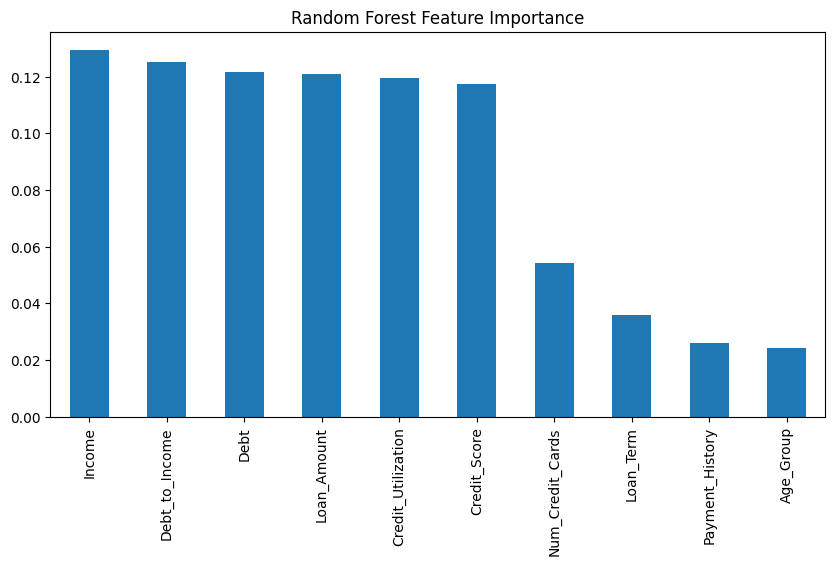

In [137]:
# Plot Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
rfc_importance.head(10).plot(kind="bar")
plt.title("Random Forest Feature Importance")
plt.show()

### **⚡ 3️⃣ XGBoost (Boosted Tree Model for Best Accuracy)**

In [63]:
!pip install xgboost

In [138]:
from xgboost import XGBClassifier

# Initialize and Train XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"\n⚡ XGBoost Accuracy: {xgb_acc:.4f}")
print(classification_report(y_test, y_pred_xgb))


⚡ XGBoost Accuracy: 0.6967
              precision    recall  f1-score   support

         0.0       0.35      0.02      0.04       714
         1.0       0.70      0.98      0.82      1686

    accuracy                           0.70      2400
   macro avg       0.53      0.50      0.43      2400
weighted avg       0.60      0.70      0.59      2400



In [139]:
# Feature Importance (Boosting Models)
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n⚡ XGBoost Feature Importance:\n", xgb_importance)



⚡ XGBoost Feature Importance:
 Age_Group                          0.057313
Education_High School              0.055438
Employment_Status_Unemployed       0.054698
Debt                               0.054305
Debt_to_Income                     0.052897
Credit_Score                       0.052728
Income                             0.052640
Loan_Amount                        0.052506
Education_Master                   0.051915
Num_Credit_Cards                   0.050990
Credit_Utilization                 0.050185
Residence_Type_Owned               0.049377
Education_PhD                      0.048644
Marital_Status_Married             0.047628
Residence_Type_Rented              0.045637
Payment_History                    0.045385
Employment_Status_Self-Employed    0.045238
Loan_Term                          0.044706
Marital_Status_Single              0.044217
Gender_Male                        0.043553
dtype: float32


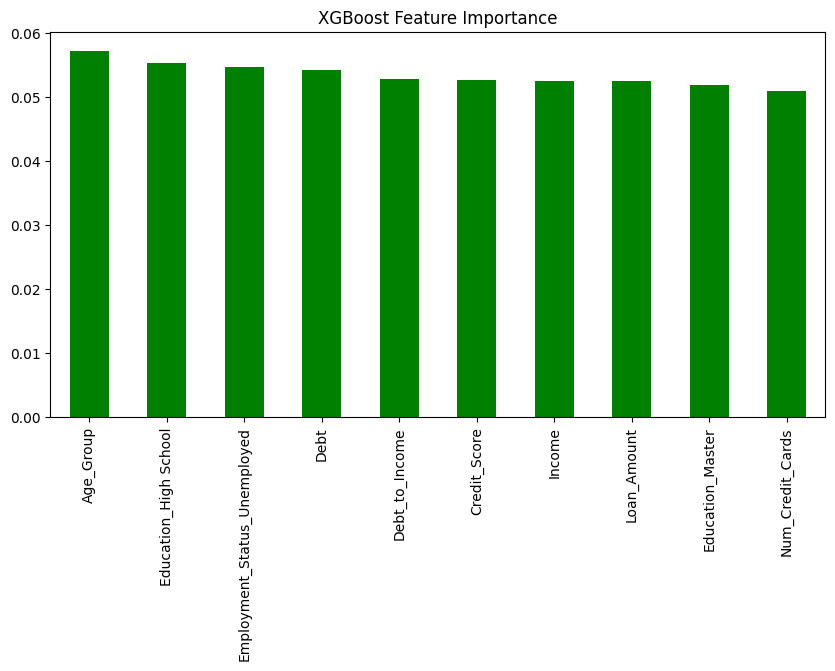

In [142]:
# Plot Feature Importance (Optional)
plt.figure(figsize=(10,5))
xgb_importance.head(10).plot(kind="bar", color='green')
plt.title("XGBoost Feature Importance")
plt.show()

In [143]:
# Store Results
results = {
    "Logistic Regression": log_reg_acc,
    "Random Forest": rfc_acc,
    "XGBoost": xgb_acc
}

# Select Best Model
best_model_name = max(results, key=results.get)
print(f"\n🔥 Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")




🔥 Best Model: Logistic Regression with Accuracy: 0.7025


### **4️⃣ Neural Network (MLP Classifier)**

In [154]:
from sklearn.neural_network import MLPClassifier

# Train a simple Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500)
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluation
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Classifier Accuracy: 0.6966666666666667
              precision    recall  f1-score   support

         0.0       0.32      0.02      0.03       714
         1.0       0.70      0.98      0.82      1686

    accuracy                           0.70      2400
   macro avg       0.51      0.50      0.43      2400
weighted avg       0.59      0.70      0.59      2400



# **✅ 7. Hyperparameter Tuning & Optimization**

## **7.1. Grid Search CV (Exhaustive Tuning)**

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters (Random Forest): {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.7026041666666667


## **7.2. Randomized Search CV (Faster Tuning)**

In [156]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5]
}

random_search = RandomizedSearchCV(XGBClassifier(random_state=42), param_dist, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters (XGBoost):", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters (XGBoost): {'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01}
Best Accuracy: 0.7026041666666667


## **7.3. Bayesian Optimization (Optuna)**

In [157]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00


In [158]:
import optuna
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5)
    }

    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print("Best Parameters (Bayesian Optimization - XGBoost):", study.best_params)


[I 2025-02-28 10:11:51,305] A new study created in memory with name: no-name-e12021e2-05ea-4ad3-83f9-c14a950d25fc
[I 2025-02-28 10:11:51,541] Trial 0 finished with value: 0.6958333333333333 and parameters: {'n_estimators': 125, 'learning_rate': 0.14817712763492752, 'max_depth': 8, 'gamma': 0.3924879019969106, 'min_child_weight': 5}. Best is trial 0 with value: 0.6958333333333333.
[I 2025-02-28 10:11:51,960] Trial 1 finished with value: 0.7033333333333334 and parameters: {'n_estimators': 153, 'learning_rate': 0.048885354961076315, 'max_depth': 4, 'gamma': 0.46687181993071286, 'min_child_weight': 1}. Best is trial 1 with value: 0.7033333333333334.
[I 2025-02-28 10:11:52,334] Trial 2 finished with value: 0.6879166666666666 and parameters: {'n_estimators': 98, 'learning_rate': 0.18107631631115523, 'max_depth': 6, 'gamma': 0.2659144006244886, 'min_child_weight': 2}. Best is trial 1 with value: 0.7033333333333334.
[I 2025-02-28 10:11:53,106] Trial 3 finished with value: 0.6929166666666666 an

Best Parameters (Bayesian Optimization - XGBoost): {'n_estimators': 153, 'learning_rate': 0.048885354961076315, 'max_depth': 4, 'gamma': 0.46687181993071286, 'min_child_weight': 1}


# **✅ 8. Model Evaluation & Validation**

## 8.1. Classification Metrics
We will calculate Accuracy, Precision, Recall, F1-Score, Confusion Matrix, and ROC-AUC Score for all models.



###  1️⃣ Logistic Regression Evaluation



In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]  # Probability for ROC-AUC

# Metrics
print("📊 Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


📊 Logistic Regression Evaluation:
Accuracy: 0.7025
Precision: 0.7025
Recall: 1.0
F1 Score: 0.8252569750367107
ROC-AUC Score: 0.5178874634076645
Confusion Matrix:
 [[   0  714]
 [   0 1686]]


### 2️⃣ Random Forest Evaluation

In [162]:
# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
print("🌲 Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🌲 Random Forest Evaluation:
Accuracy: 0.7016666666666667
Precision: 0.7022518765638032
Recall: 0.9988137603795967
F1 Score: 0.8246816846229187
ROC-AUC Score: 0.5076524085316214
Confusion Matrix:
 [[   0  714]
 [   2 1684]]


### 3️⃣ XGBoost Evaluation

In [163]:
# Predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Metrics
print("🔥 XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


🔥 XGBoost Evaluation:
Accuracy: 0.6770833333333334
Precision: 0.7032574743418117
Recall: 0.9347568208778173
F1 Score: 0.8026483320600968
ROC-AUC Score: 0.4846835531365571
Confusion Matrix:
 [[  49  665]
 [ 110 1576]]


### 4️⃣ Neural Network (MLP) Evaluation

In [164]:
# Predictions
y_pred_mlp = mlp.predict(X_test)
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Metrics
print("🧠 MLP Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


🧠 MLP Classifier Evaluation:
Accuracy: 0.6966666666666667
Precision: 0.7027942421676545
Recall: 0.9845788849347569
F1 Score: 0.8201581027667985
ROC-AUC Score: 0.49977654169615654
Confusion Matrix:
 [[  12  702]
 [  26 1660]]


## **8.2. Cross-Validation**

In [165]:
# K-Fold (K=5) for Better Generalization
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross Validation
k_fold_accuracy = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Random Forest - 5-Fold CV Accuracy:", k_fold_accuracy.mean())


Random Forest - 5-Fold CV Accuracy: 0.7025


In [166]:
# Stratified K-Fold to Maintain Class Balance
from sklearn.model_selection import StratifiedKFold

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Running Stratified K-Fold for XGBoost
strat_kfold_scores = cross_val_score(xgb, X, y, cv=strat_kfold, scoring='accuracy')
print("XGBoost - Stratified K-Fold Accuracy:", strat_kfold_scores.mean())


XGBoost - Stratified K-Fold Accuracy: 0.6727500000000001


## **8.3. Model Explainability**
To understand feature importance, we use SHAP & LIME.

SHAP (SHapley Additive Explanations) for XGBoost

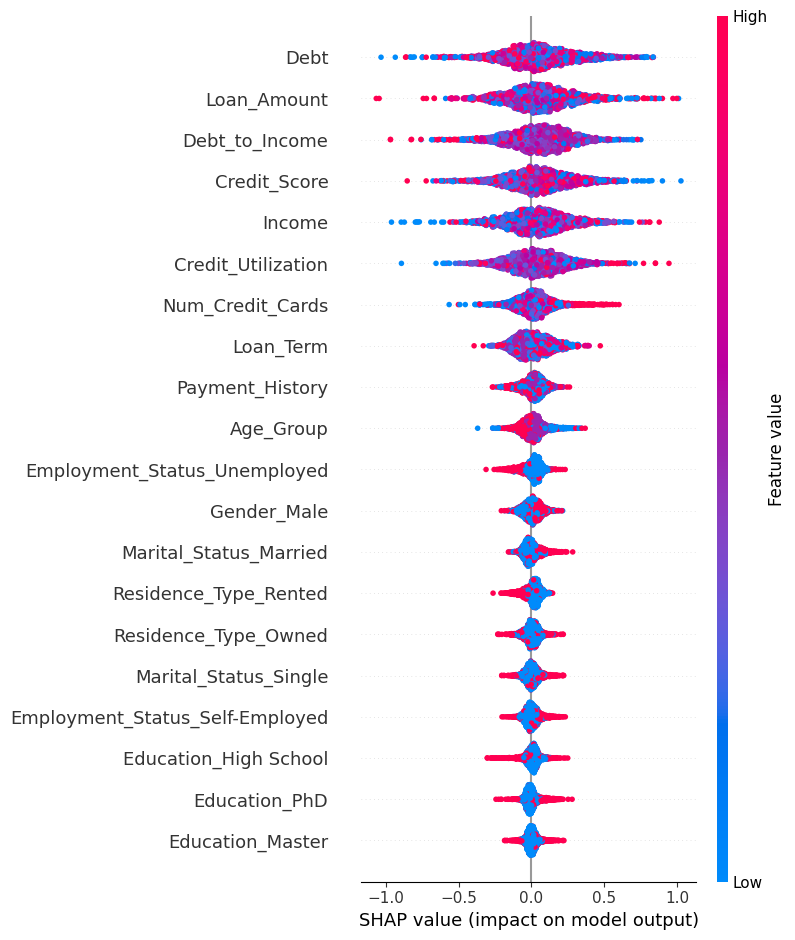

In [167]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)


In [169]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=24c68a77a284f641cddada9cc2a9d29dce4fa1030d2720eaddca5822f15563a1
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [170]:
# LIME (Local Interpretable Model-Agnostic Explanations) for Random Forest
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=X.columns, class_names=["Low Credit", "High Credit"], mode='classification'
)

# Explain a single prediction
exp = explainer.explain_instance(X_test.iloc[0].values, rf.predict_proba)
exp.show_in_notebook()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Compute Accuracy for All Models

In [171]:
# Store model names and accuracy scores
model_names = ["Logistic Regression", "Random Forest", "XGBoost", "MLP (Neural Network)"]
accuracies = [
    accuracy_score(y_test, y_pred_log),   # Logistic Regression
    accuracy_score(y_test, y_pred_rf),    # Random Forest
    accuracy_score(y_test, y_pred_xgb),   # XGBoost
    accuracy_score(y_test, y_pred_mlp)    # MLP Neural Network
]

# Find Best Model
best_model_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_index]
best_model_accuracy = max(accuracies)

print(f"🏆 Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


🏆 Best Model: Logistic Regression with Accuracy: 0.7025


## Plot Graph for Accuracy Comparison

<ipython-input-172-d56919811d3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


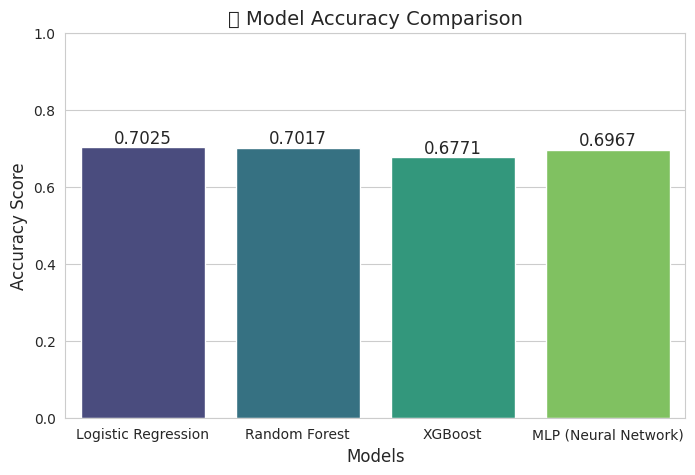

In [172]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")

# Labeling
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("📊 Model Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)  # Accuracy range (0 to 1)

# Annotate values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha="center", fontsize=12)

# Show plot
plt.show()